In [1]:
# Mengimport library yang diperlukan dan memberikan alias

import numpy as np  # NumPy untuk operasi numerik dan array
import pandas as pd  # Pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data

In [2]:
dataset = pd.read_csv('data_kesehatan_tidur.csv', sep = ';')  # Membaca CSV dengan pemisah ;
x = dataset.iloc[:, :-1].values  # Memisahkan fitur (semua kolom kecuali kolom terakhir)
y = dataset.iloc[:, -1].values  # Memisahkan label (kolom terakhir sebagai target)

In [3]:
print(x)  # Menampilkan array fitur (X)

[['Laki-laki' 6.0 1.0 113.0 2.0 33.0 'Ya']
 ['Perempuan' 8.0 nan 119.0 6.0 19.0 'Ya']
 ['Perempuan' 7.0 3.0 110.0 6.0 28.0 'Tidak']
 ['Laki-laki' 8.0 3.0 125.0 5.0 35.0 'Ya']
 ['Perempuan' nan 2.0 99.0 9.0 27.0 'Tidak']
 ['Perempuan' 7.0 4.0 nan 3.0 34.0 'Tidak']
 ['Laki-laki' 9.0 4.0 nan 5.0 22.0 nan]
 ['Perempuan' 7.0 0.0 134.0 5.0 31.0 'Ya']
 ['Perempuan' nan 0.0 116.0 3.0 27.0 'Ya']
 ['Laki-laki' 7.0 3.0 139.0 6.0 30.0 'Ya']
 ['Laki-laki' nan 2.0 120.0 nan 19.0 'Tidak']
 ['Laki-laki' 8.0 1.0 101.0 6.0 21.0 'Ya']
 ['Perempuan' 7.0 3.0 131.0 3.0 20.0 'Ya']
 ['Laki-laki' 6.0 nan 107.0 5.0 nan 'Ya']
 ['Laki-laki' 9.0 3.0 nan 2.0 32.0 'Tidak']]


In [4]:
print(y)  # Menampilkan array label (Y)

['Tidak' 'Ya' 'Ya' 'Ya' 'Ya' 'Tidak' 'Tidak' 'Tidak' 'Tidak' 'Ya' 'Ya'
 'Ya' 'Tidak' 'Ya' 'Tidak']


In [5]:
# Mengimport SimpleImputer untuk menangani missing values
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')  # Mengisi missing values pada kolom numerik dengan rata-rata
numeric_cols = ["Durasi Tidur", "Kafein Harian", "Tekanan Darah", "Waktu Layar", "BMI"]  # Daftar kolom numerik
dataset[numeric_cols] = num_imputer.fit_transform(dataset[numeric_cols])  # Menerapkan imputasi ke kolom numerik di dataset

In [6]:
print(dataset[numeric_cols])  # Menampilkan kolom numerik di dataset untuk memastikan tidak ada missing value (nan)

    Durasi Tidur  Kafein Harian  Tekanan Darah  Waktu Layar   BMI
0       6.000000       1.000000     113.000000     2.000000  33.0
1       8.000000       2.230769     119.000000     6.000000  19.0
2       7.000000       3.000000     110.000000     6.000000  28.0
3       8.000000       3.000000     125.000000     5.000000  35.0
4       7.416667       2.000000      99.000000     9.000000  27.0
5       7.000000       4.000000     117.833333     3.000000  34.0
6       9.000000       4.000000     117.833333     5.000000  22.0
7       7.000000       0.000000     134.000000     5.000000  31.0
8       7.416667       0.000000     116.000000     3.000000  27.0
9       7.000000       3.000000     139.000000     6.000000  30.0
10      7.416667       2.000000     120.000000     4.714286  19.0
11      8.000000       1.000000     101.000000     6.000000  21.0
12      7.000000       3.000000     131.000000     3.000000  20.0
13      6.000000       2.230769     107.000000     5.000000  27.0
14      9.

In [7]:
cat_imputer = SimpleImputer(strategy='most_frequent')  # Mengisi missing values pada kolom kategorikal dengan nilai terbanyak
categorical_cols = ["Sering Telat Bangun"]  # Daftar kolom kategorikal yang akan diimputasi
dataset[categorical_cols] = cat_imputer.fit_transform(dataset[categorical_cols])  # Menerapkan imputasi ke kolom kategorikal di dataset

In [8]:
print(dataset[categorical_cols])  # Menampilkan kolom kategorikal di dataset untuk memastikan tidak ada missing value (nan)

   Sering Telat Bangun
0                   Ya
1                   Ya
2                Tidak
3                   Ya
4                Tidak
5                Tidak
6                   Ya
7                   Ya
8                   Ya
9                   Ya
10               Tidak
11                  Ya
12                  Ya
13                  Ya
14               Tidak


In [9]:
x = dataset.iloc[:, :-1].values  # Memuat ulang array fitur (X) dari dataset yang sudah tidak ada missing values

In [10]:
print(x)  # Menampilkan array fitur (X) memastikan tidak ada missing values

[['Laki-laki' 6.0 1.0 113.0 2.0 33.0 'Ya']
 ['Perempuan' 8.0 2.230769230769231 119.0 6.0 19.0 'Ya']
 ['Perempuan' 7.0 3.0 110.0 6.0 28.0 'Tidak']
 ['Laki-laki' 8.0 3.0 125.0 5.0 35.0 'Ya']
 ['Perempuan' 7.416666666666667 2.0 99.0 9.0 27.0 'Tidak']
 ['Perempuan' 7.0 4.0 117.83333333333333 3.0 34.0 'Tidak']
 ['Laki-laki' 9.0 4.0 117.83333333333333 5.0 22.0 'Ya']
 ['Perempuan' 7.0 0.0 134.0 5.0 31.0 'Ya']
 ['Perempuan' 7.416666666666667 0.0 116.0 3.0 27.0 'Ya']
 ['Laki-laki' 7.0 3.0 139.0 6.0 30.0 'Ya']
 ['Laki-laki' 7.416666666666667 2.0 120.0 4.714285714285714 19.0 'Tidak']
 ['Laki-laki' 8.0 1.0 101.0 6.0 21.0 'Ya']
 ['Perempuan' 7.0 3.0 131.0 3.0 20.0 'Ya']
 ['Laki-laki' 6.0 2.230769230769231 107.0 5.0 27.0 'Ya']
 ['Laki-laki' 9.0 3.0 117.83333333333333 2.0 32.0 'Tidak']]


In [11]:
# Encoding Data Kategorikal
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # Mengimpor encoder untuk mengubah data kategorikal menjadi numerik
from sklearn.compose import ColumnTransformer  # Mengimpor ColumnTransformer untuk menerapkan transformasi pada beberapa kolom

# Encoding kolom "Jenis Kelamin"(index: 0) dan "Sering Telat Bangun"(index: 6) dengan One-Hot Encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 6])], remainder='passthrough')
x = np.array(ct.fit_transform(x))  # Menerapkan One-Hot Encoding dan mengubah hasilnya menjadi array NumPy

In [12]:
print(x)  # Menampilkan array x

[[1.0 0.0 0.0 1.0 6.0 1.0 113.0 2.0 33.0]
 [0.0 1.0 0.0 1.0 8.0 2.230769230769231 119.0 6.0 19.0]
 [0.0 1.0 1.0 0.0 7.0 3.0 110.0 6.0 28.0]
 [1.0 0.0 0.0 1.0 8.0 3.0 125.0 5.0 35.0]
 [0.0 1.0 1.0 0.0 7.416666666666667 2.0 99.0 9.0 27.0]
 [0.0 1.0 1.0 0.0 7.0 4.0 117.83333333333333 3.0 34.0]
 [1.0 0.0 0.0 1.0 9.0 4.0 117.83333333333333 5.0 22.0]
 [0.0 1.0 0.0 1.0 7.0 0.0 134.0 5.0 31.0]
 [0.0 1.0 0.0 1.0 7.416666666666667 0.0 116.0 3.0 27.0]
 [1.0 0.0 0.0 1.0 7.0 3.0 139.0 6.0 30.0]
 [1.0 0.0 1.0 0.0 7.416666666666667 2.0 120.0 4.714285714285714 19.0]
 [1.0 0.0 0.0 1.0 8.0 1.0 101.0 6.0 21.0]
 [0.0 1.0 0.0 1.0 7.0 3.0 131.0 3.0 20.0]
 [1.0 0.0 0.0 1.0 6.0 2.230769230769231 107.0 5.0 27.0]
 [1.0 0.0 1.0 0.0 9.0 3.0 117.83333333333333 2.0 32.0]]


In [13]:
le = LabelEncoder()  # Membuat objek LabelEncoder pada variabel le untuk mengubah label kategorikal menjadi numerik
y = le.fit_transform(y)  # Menerapkan encoding pada label (y)

In [14]:
print(y)  # Menampilkan array y

[0 1 1 1 1 0 0 0 0 1 1 1 0 1 0]


In [15]:
from sklearn.model_selection import train_test_split  # Mengimpor train_test_split untuk membagi dataset menjadi data latih dan data uji

# Membagi dataset menjadi dua bagian:
# - x_train dan y_train untuk melatih model (80% dari data)
# - x_test dan y_test untuk menguji model (20% dari data)
# Parameter random_state=1 memastikan pembagian data yang sama setiap kali kode dijalankan
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [16]:
print(x_train)  # Menampilkan array x_train

[[0.0 1.0 1.0 0.0 7.0 3.0 110.0 6.0 28.0]
 [1.0 0.0 1.0 0.0 7.416666666666667 2.0 120.0 4.714285714285714 19.0]
 [0.0 1.0 1.0 0.0 7.416666666666667 2.0 99.0 9.0 27.0]
 [0.0 1.0 0.0 1.0 8.0 2.230769230769231 119.0 6.0 19.0]
 [1.0 0.0 0.0 1.0 6.0 2.230769230769231 107.0 5.0 27.0]
 [1.0 0.0 0.0 1.0 6.0 1.0 113.0 2.0 33.0]
 [1.0 0.0 1.0 0.0 9.0 3.0 117.83333333333333 2.0 32.0]
 [1.0 0.0 0.0 1.0 7.0 3.0 139.0 6.0 30.0]
 [0.0 1.0 0.0 1.0 7.416666666666667 0.0 116.0 3.0 27.0]
 [0.0 1.0 0.0 1.0 7.0 3.0 131.0 3.0 20.0]
 [1.0 0.0 0.0 1.0 8.0 1.0 101.0 6.0 21.0]
 [0.0 1.0 1.0 0.0 7.0 4.0 117.83333333333333 3.0 34.0]]


In [17]:
print(x_test)  # Menampilkan array x_test

[[1.0 0.0 0.0 1.0 8.0 3.0 125.0 5.0 35.0]
 [0.0 1.0 0.0 1.0 7.0 0.0 134.0 5.0 31.0]
 [1.0 0.0 0.0 1.0 9.0 4.0 117.83333333333333 5.0 22.0]]


In [18]:
print(y_train)  # Menampilkan array y_train

[1 1 1 1 1 0 0 1 0 0 1 0]


In [19]:
print(y_test)  # Menampilkan array y_test

[1 0 0]


In [20]:
from sklearn.preprocessing import StandardScaler  # Mengimpor StandardScaler untuk normalisasi data

sc = StandardScaler()  # Inisialisasi objek StandardScaler pada variabel sc

# Standarisasi hanya untuk fitur numerik (dimulai dari indeks ke-4)
# karena fitur 0-3 adalah hasil One-Hot Encoding "Jenis Kelamin" dan "Sering Telat Bangun" (berisi 0 dan 1)
x_train[:, 4:] = sc.fit_transform(x_train[:, 4:])  # Fit dan transformasi pada data training
x_test[:, 4:] = sc.transform(x_test[:, 4:])  # Hanya transformasi pada data testing (menggunakan skala yang sama)


In [21]:
print(x_train)  # Menampilkan array x_train

[[0.0 1.0 1.0 0.0 -0.3394128616614478 0.7466087288315868
  -0.5402926865238011 0.6747097830170129 0.30242663535891173]
 [1.0 0.0 1.0 0.0 0.18276077166385743 -0.19267322034363496
  0.3771854604034066 0.035511041211421616 -1.4166300287864826]
 [0.0 1.0 1.0 0.0 0.18276077166385743 -0.19267322034363496
  -1.5495186481437295 2.166173513896726 0.11142033934275682]
 [0.0 1.0 0.0 1.0 0.9138038583192839 0.024084152542954738
  0.2854376457106858 0.6747097830170129 -1.4166300287864826]
 [1.0 0.0 0.0 1.0 -1.5926295816421794 0.024084152542954738
  -0.8155361306019634 0.1775552060571085 0.11142033934275682]
 [1.0 0.0 0.0 1.0 -1.5926295816421794 -1.1319551695188568
  -0.26504924244563877 -1.3139085248226046 1.2574581154396864]
 [1.0 0.0 1.0 0.0 2.1670205783000154 0.7466087288315868
  0.17839852856917782 -1.3139085248226046 1.0664518194235315]
 [1.0 0.0 0.0 1.0 -0.3394128616614478 0.7466087288315868
  2.1203939395651012 0.6747097830170129 0.6844392273912215]
 [0.0 1.0 0.0 1.0 0.18276077166385743 -2.07

In [22]:
print(x_test)  # Menampilkan array x_test

[[1.0 0.0 0.0 1.0 0.9138038583192839 0.7466087288315868
  0.8359245338670104 0.1775552060571085 1.6394707074719963]
 [0.0 1.0 0.0 1.0 -0.3394128616614478 -2.0712371186940786
  1.6616548661014974 0.1775552060571085 0.8754455234073765]
 [1.0 0.0 0.0 1.0 2.1670205783000154 1.6858906780068086
  0.17839852856917782 0.1775552060571085 -0.8436111407380178]]


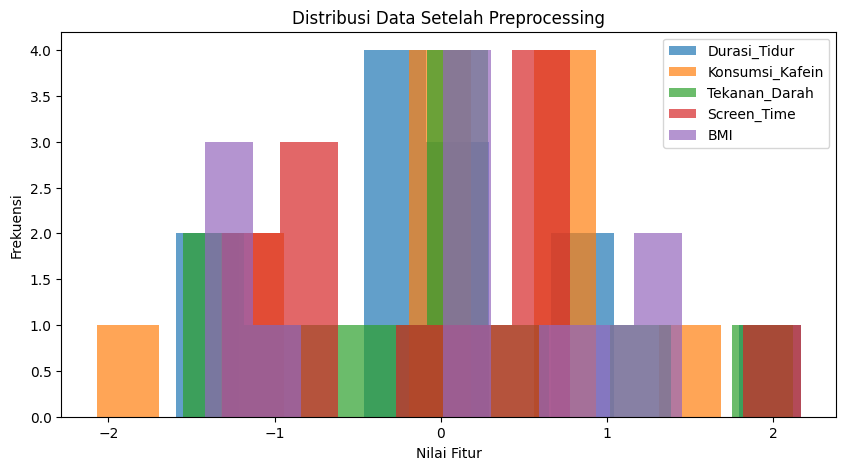

In [23]:
# Menampilkan distribusi fitur numerik setelah preprocessing
# Daftar nama kolom fitur setelah One-Hot Encoding
feature_names = ["Jenis_Kelamin_L", "Jenis_Kelamin_P", "Kebiasaan_Bangun_Terlambat_Tidak", "Kebiasaan_Bangun_Terlambat_Ya",
                 "Durasi_Tidur", "Konsumsi_Kafein", "Tekanan_Darah", "Screen_Time", "BMI"]

# Konversi x_train menjadi DataFrame Pandas agar lebih mudah diproses
x_train_df = pd.DataFrame(x_train, columns=feature_names)

# Membuat histogram untuk melihat distribusi fitur numerik setelah preprocessing
plt.figure(figsize=(10, 5))  # Menentukan ukuran gambar
for col in ["Durasi_Tidur", "Konsumsi_Kafein", "Tekanan_Darah", "Screen_Time", "BMI"]:  # Memilih kolom numerik
    plt.hist(x_train_df[col], bins=10, alpha=0.7, label=col)  # Membuat histogram untuk setiap fitur

# Menambahkan label dan judul pada plot
plt.xlabel("Nilai Fitur")  # Label sumbu x
plt.ylabel("Frekuensi")  # Label sumbu y
plt.title("Distribusi Data Setelah Preprocessing")  # Judul plot
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot
